In [64]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
ColumnNames = ['ID','F2','F3','F4', 'F5','F6','F7','F8','F9','F10','Class']

In [37]:
dataframe = pd.read_csv('breast-cancer-wisconsin.data', names = ColumnNames, sep = ',', header=None, na_values = '?')

In [38]:
dataframe.head(5)

,ID,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [39]:
dataframe.tail(5)

,ID,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4
698,897471,4,8,8,5,4,5.0,10,4,1,4


In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      699 non-null    int64  
 1   F2      699 non-null    int64  
 2   F3      699 non-null    int64  
 3   F4      699 non-null    int64  
 4   F5      699 non-null    int64  
 5   F6      699 non-null    int64  
 6   F7      683 non-null    float64
 7   F8      699 non-null    int64  
 8   F9      699 non-null    int64  
 9   F10     699 non-null    int64  
 10  Class   699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [41]:
dataframe.isnull().sum()

ID        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7       16
F8        0
F9        0
F10       0
Class     0
dtype: int64

In [42]:
dataframe.reset_index(drop = True)

,ID,F2,F3,F4,F5,F6,F7,F8,F9,F10,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [43]:
dataframe.fillna(999, inplace = True)

In [44]:
dataframe["Class"] = np.where(dataframe["Class"] == 2, 0, 1)

In [45]:
dataframeX = dataframe[dataframe['Class'] == 0]
dataframeY = dataframe[dataframe['Class'] == 1]

In [46]:
dataframeXYdata = {'X': [dataframeX.shape[0]], 'Y': [dataframeY.shape[0]]}

<AxesSubplot:>

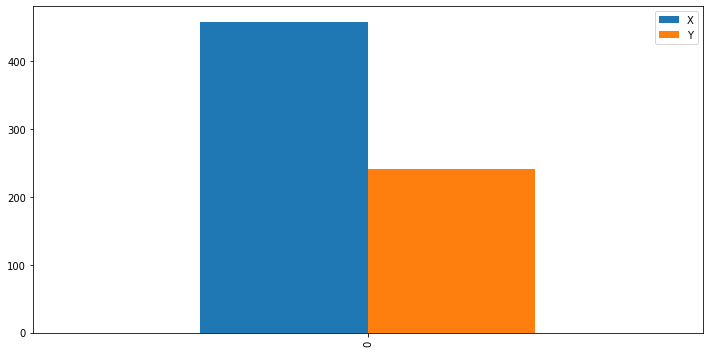

In [47]:
dataframeXYplot = pd.DataFrame(data = dataframeXYdata)
dataframeXYplot.plot(kind = 'bar', figsize = (12,6))

In [48]:
X = dataframe.iloc[:,1:10]

In [49]:
Y = dataframe['Class']

In [50]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 50)

In [80]:
LRModel = LogisticRegression(max_iter = 50)

In [81]:
LRModel.fit(X_Train, Y_Train)

C:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50)

In [82]:
PredictionProb = LRModel.predict_proba(X_Test)

In [83]:
FPR, TPR, Threshold = roc_curve(Y_Test, PredictionProb[:,1], pos_label=1)

In [84]:
RandomProb = [0 for i in range(len(Y_Test))]
FPRp, TPRp, _ = roc_curve(Y_Test, RandomProb, pos_label=1)

In [85]:
AUCscore = roc_auc_score(Y_Test, PredictionProb[:,1])

In [86]:
print(AUCscore)

0.9867702041990222


Text(0, 0.5, 'True Positive rate')

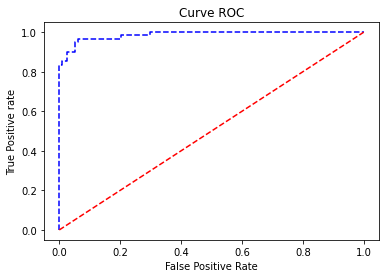

In [87]:
plt.plot(FPR, TPR, linestyle='--', color='blue', label = 'Logistic Regression Model')
plt.plot(FPRp, TPRp, linestyle='--', color='red')
plt.title('Curve ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [88]:
Y_Pred = LRModel.predict(X_Test)
Y_Pred_Train = LRModel.predict(X_Train)

In [89]:
ACC_List = []

In [90]:
AC = accuracy_score(Y_Test, Y_Pred)
ACC_List.append(AC)
AC_Train = accuracy_score (Y_Train, Y_Pred_Train)

In [91]:
print("Logistic Regression Model")
print("Accuracy of Training Set: " , AC_Train)
print("Accuracy of Test Set: {0}".format(AC))

Logistic Regression Model
Accuracy of Training Set:  0.9580152671755725
Accuracy of Test Set: 0.9371428571428572
